# Análisis Exploratorio de Datos


In [1]:
# Importamos las librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Creamos un dataframe de pandas con el archivo que limpiamos, llamado hechos_limp.csv
datos = pd.read_csv('hechos_limp.csv')

In [3]:
# Revisamos que se haya cargado
datos.head()

,id,rol,sexo,edad,fecha_fallecimiento,n_victimas,fecha_hecho,aaaa,mm,dd,...,lugar_del_hecho,tipo_de_calle,calle,comuna,xy (caba),pos x,pos y,participantes,victima,acusado
0,2016-0001,CONDUCTOR,MASCULINO,19.0,2016-01-01 00:00:00,1,2016-01-01,2016,1,1,...,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70.0,2016-01-02 00:00:00,1,2016-01-02,2016,1,2,...,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30.0,2016-01-03 00:00:00,1,2016-01-03,2016,1,3,...,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18.0,2016-01-10,1,2016-01-10,2016,1,10,...,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-AUTO,MOTO,AUTO
4,2016-0005,CONDUCTOR,MASCULINO,29.0,2016-02-01 00:00:00,1,2016-01-21,2016,1,21,...,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [4]:
# Verificamos que columnas tenemos 
datos.columns

Index(['id', 'rol', 'sexo', 'edad', 'fecha_fallecimiento', 'n_victimas',
       'fecha_hecho', 'aaaa', 'mm', 'dd', 'hora', 'hh', 'lugar_del_hecho',
       'tipo_de_calle', 'calle', 'comuna', 'xy (caba)', 'pos x', 'pos y',
       'participantes', 'victima', 'acusado'],
      dtype='object')

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   717 non-null    object 
 1   rol                  717 non-null    object 
 2   sexo                 717 non-null    object 
 3   edad                 717 non-null    float64
 4   fecha_fallecimiento  717 non-null    object 
 5   n_victimas           717 non-null    int64  
 6   fecha_hecho          717 non-null    object 
 7   aaaa                 717 non-null    int64  
 8   mm                   717 non-null    int64  
 9   dd                   717 non-null    int64  
 10  hora                 717 non-null    object 
 11  hh                   717 non-null    object 
 12  lugar_del_hecho      717 non-null    object 
 13  tipo_de_calle        717 non-null    object 
 14  calle                716 non-null    object 
 15  comuna               717 non-null    int

Revisemos las columnas que contienen Variables Categóricas


In [6]:
datos['rol'].value_counts()

CONDUCTOR               341
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
Name: rol, dtype: int64

Graficamos para observar de mejor manera la distribución

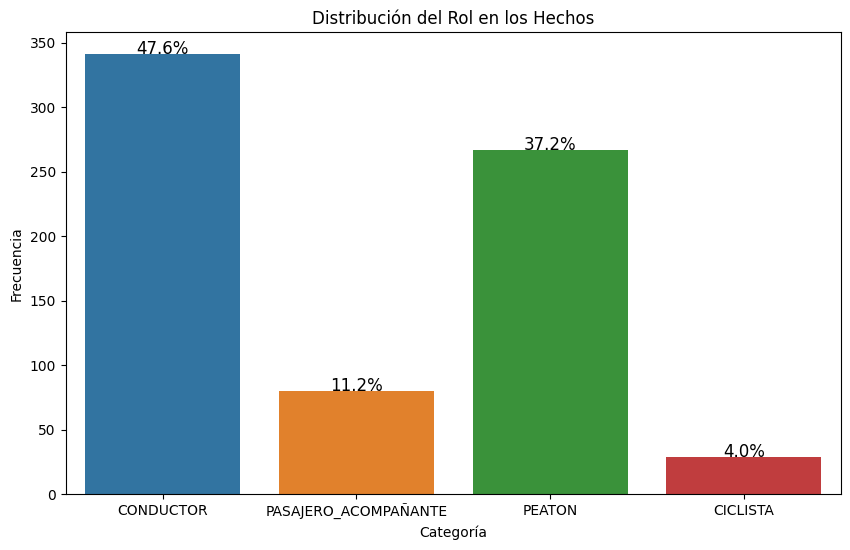

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data = datos, x ='rol')
plt.title('Distribución del Rol en los Hechos')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
total = len(datos)  
ax = plt.gca()  
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=12, color='black')
plt.show()

Al observar el gráfico de barras que muestra la distribución de roles en los Siniestros, se puede notar que la persona que condujo el vehículo involucrado en el hecho representa la categoría más frecuente, constituyendo casi el 50% de las víctimas, seguida por los peatones con un 37%, los pasajeros con un 11%, y los ciclistas con un 4%. 

In [8]:
datos['sexo'].value_counts()

MASCULINO    551
FEMENINO     166
Name: sexo, dtype: int64

Graficamos

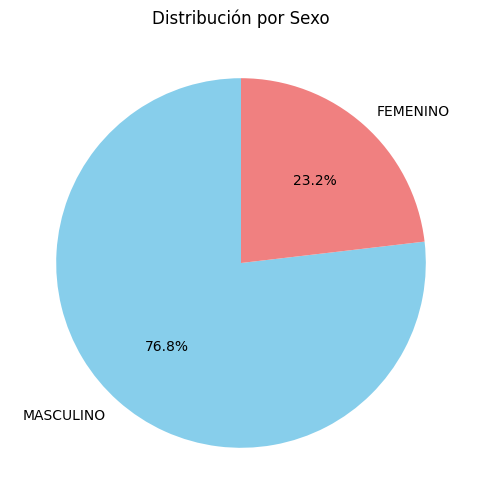

In [9]:
conteo_sexos = datos['sexo'].value_counts()
plt.figure(figsize=(6,6))
colores = ['skyblue', 'lightcoral']

plt.pie(conteo_sexos, labels=conteo_sexos.index, autopct='%1.1f%%', startangle=90,colors=colores)


plt.title('Distribución por Sexo')

plt.show()

Al examinar el gráfico de torta que muestra la distribución por sexo, se destaca que aproximadamente el 77% de los casos corresponden a individuos de sexo masculino, mientras que alrededor del 23% de los casos corresponden a individuos de sexo femenino. Esta diferencia significativa en la distribución de género sugiere que los incidentes analizados pueden mostrar un sesgo en cuanto a la participación de género.

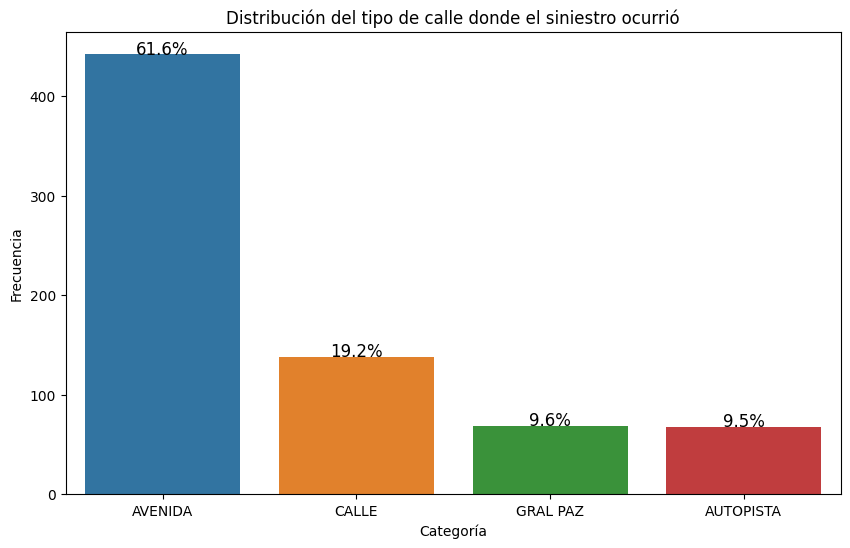

In [10]:

categoria_counts = datos['tipo_de_calle'].value_counts().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=categoria_counts.index, y=categoria_counts.values)
plt.title('Distribución del tipo de calle donde el siniestro ocurrió')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks() 

total = len(datos)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=12, color='black')

plt.show()

Este gráfico de barras ilustra la distribución de tipos de calles donde se produjeron ciertos siniestros, y muestra que las avenidas representan la mayoría con un 61.6%, seguidas de las calles con un 19.2%, la autopista General Paz con un 9.6%, y otras autopistas con un 9.5%.

In [11]:
datos['participantes'].value_counts()

PEATON-PASAJEROS       105
MOTO-AUTO              100
PEATON-AUTO             83
MOTO-CARGAS             81
MOTO-PASAJEROS          50
MOTO-OBJETO FIJO        40
PEATON-CARGAS           38
AUTO-AUTO               37
PEATON-MOTO             30
MOTO-MOTO               26
AUTO-OBJETO FIJO        26
AUTO-CARGAS             15
BICICLETA-CARGAS        10
AUTO-PASAJEROS          10
MOTO-MULTIPLE            8
BICICLETA-PASAJEROS      8
BICICLETA-AUTO           8
PEATON-MULTIPLE          5
PEATON-BICICLETA         5
MOTO-OTRO                4
CARGAS-CARGAS            4
AUTO-MULTIPLE            3
PASAJEROS-PASAJEROS      3
OBJETO FIJO-AUTO         2
MOTO-BICICLETA           2
MOVIL-CARGAS             2
PASAJEROS-AUTO           2
PEATON_MOTO-MOTO         2
CARGAS-OBJETO FIJO       1
CARGAS-AUTO              1
MOVIL-PASAJEROS          1
AUTO-OTRO                1
CARGAS-PASAJEROS         1
BICICLETA-MULTIPLE       1
BICICLETA-TREN           1
BICICLETA-OTRO           1
Name: participantes, dtype: 

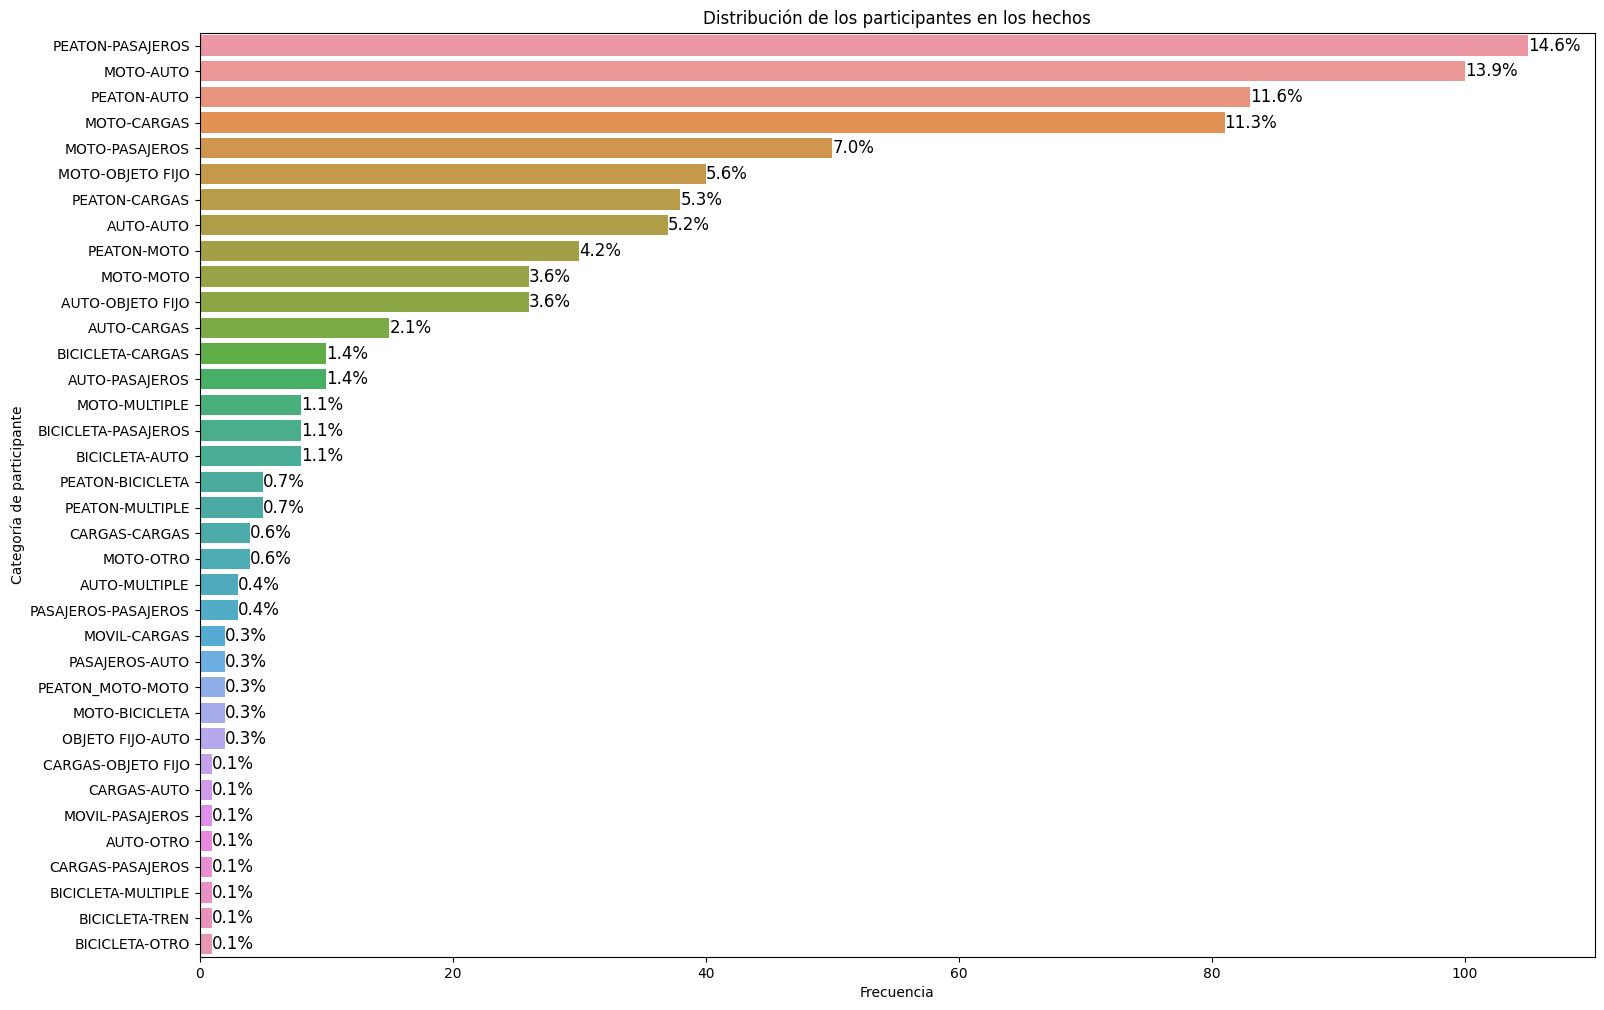

In [12]:
frecuencia_participantes = datos['participantes'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(18, 12))
sns.countplot(data=datos, y='participantes', order=frecuencia_participantes.index)
plt.title('Distribución de los participantes en los hechos')
plt.xlabel('Frecuencia')
plt.ylabel('Categoría de participante')
total = len(datos)
ax = plt.gca()
for p in ax.patches:
    width = p.get_width()
    percentage = f'{100 * width / total:.1f}%'
    ax.annotate(percentage, (width, p.get_y() + p.get_height() / 2.), va='center', fontsize=12, color='black', rotation=0)
plt.show()

In [13]:
datos['victima'].value_counts()

MOTO           311
PEATON         266
AUTO            92
BICICLETA       29
CARGAS           7
PASAJEROS        5
MOVIL            3
OBJETO FIJO      2
PEATON_MOTO      2
Name: victima, dtype: int64

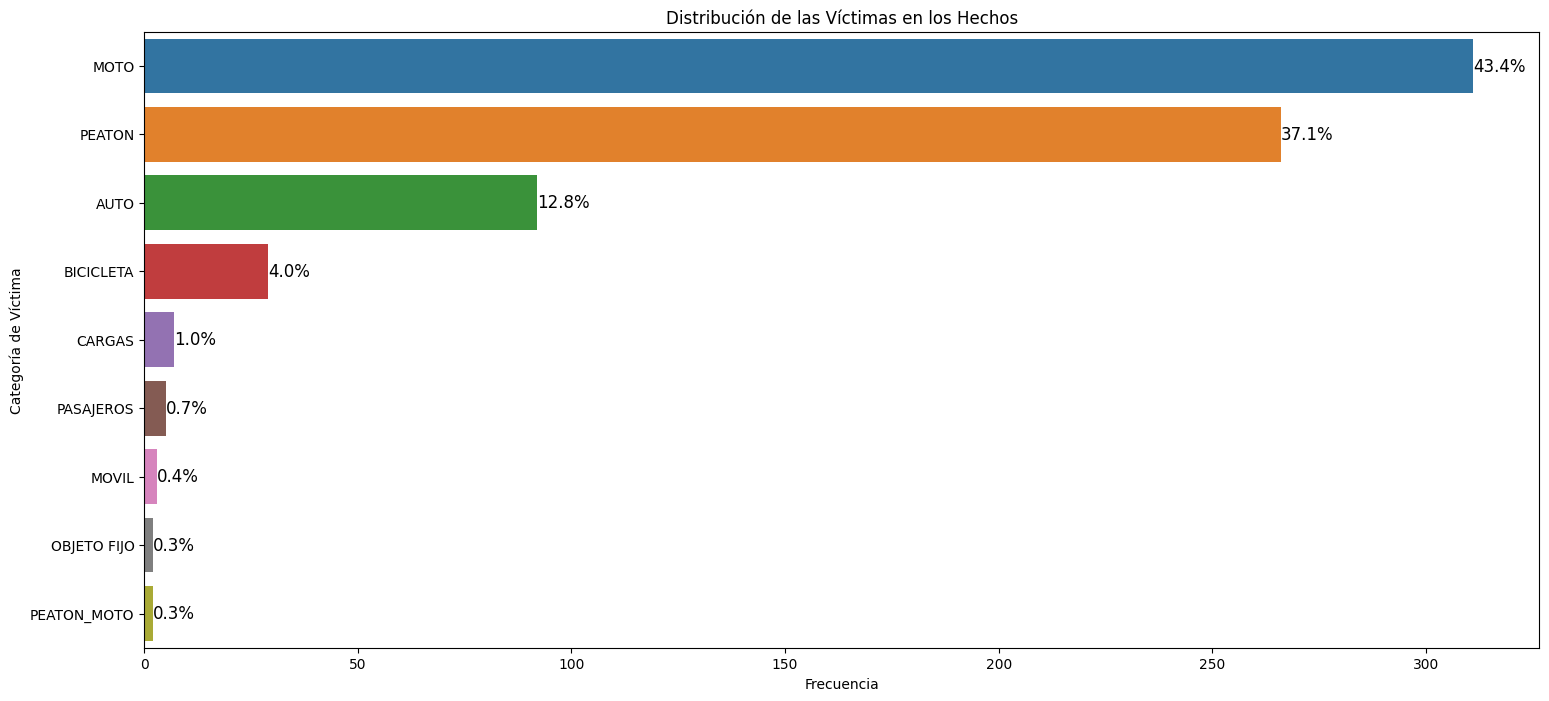

In [14]:
frecuencia_victimas = datos['victima'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(18, 8))
sns.countplot(data=datos, y='victima', order=frecuencia_victimas.index)
plt.title('Distribución de las Víctimas en los Hechos')
plt.xlabel('Frecuencia')
plt.ylabel('Categoría de Víctima')
total = len(datos)
ax = plt.gca()
for p in ax.patches:
    width = p.get_width()
    percentage = f'{100 * width / total:.1f}%'
    ax.annotate(percentage, (width, p.get_y() + p.get_height() / 2.), va='center', fontsize=12, color='black', rotation=0)
plt.show()

Analizando la distribución de las víctimas involucradas en los hechos, los datos revelan que las motocicletas representan la mayoría de las víctimas, con un considerable 43.4%, seguidas de peatones con un 37.1%. Los automóviles representan un 12.8%, mientras que las bicicletas, cargas, pasajeros, vehículos móviles, objetos fijos y las colisiones entre peatones y motocicletas contribuyen en menor medida, variando desde el 0.3% al 4%. Esta distribución de víctimas proporciona información valiosa para comprender el perfil de los afectados en estos incidentes y puede servir de base para estrategias de prevención y seguridad vial adecuadas.

In [15]:
datos['acusado'].value_counts()

AUTO           233
PASAJEROS      178
CARGAS         150
OBJETO FIJO     67
MOTO            58
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: acusado, dtype: int64

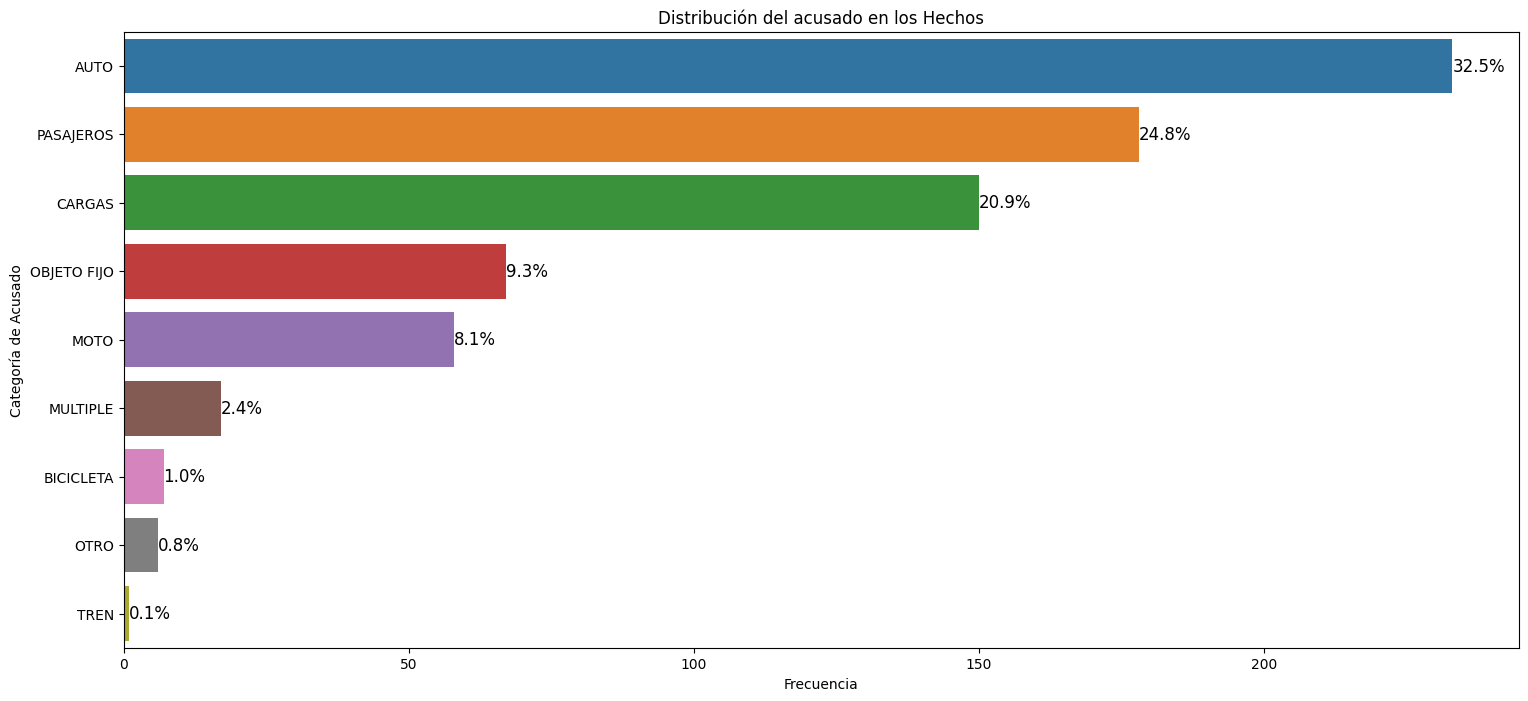

In [16]:
frecuencia_acusado = datos['acusado'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(18, 8))
sns.countplot(data=datos, y='acusado', order=frecuencia_acusado.index)
plt.title('Distribución del acusado en los Hechos')
plt.xlabel('Frecuencia')
plt.ylabel('Categoría de Acusado')
total = len(datos)
ax = plt.gca()
for p in ax.patches:
    width = p.get_width()
    percentage = f'{100 * width / total:.1f}%'
    ax.annotate(percentage, (width, p.get_y() + p.get_height() / 2.), va='center', fontsize=12, color='black', rotation=0)
plt.show()

### Analizaremos las variables numéricas


In [34]:
datos['edad'].min()

1.0

In [35]:
datos['edad'].max()

95.0

In [17]:
datos['edad'].mean().round(2)

41.79

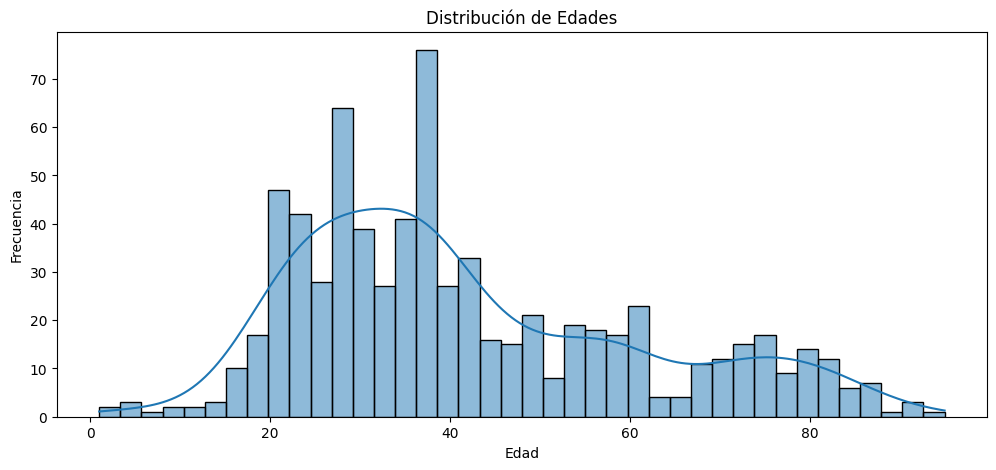

In [18]:
# Supongamos que tienes un DataFrame llamado 'df' con una columna 'edad'
plt.figure(figsize=(12, 5))  # Establecer el tamaño de la figura

# Gráfico de distribución de edades usando un histograma
sns.histplot(data=datos, x='edad', bins=40, kde=True)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades')
plt.show()

Esta distribución de edades de fallecidos en accidentes de tránsito, con edades oscilando entre 1 y 95 años. La mediana de edad de las víctimas es de 37 años y la media es de 42 años, lo que sugiere un sesgo hacia la izquierda en la distribución, indicando que la mayoría de las víctimas son personas más jóvenes. A pesar de que el valor máximo es de 95 años, la mayoría de las fatalidades se concentran en edades más tempranas.

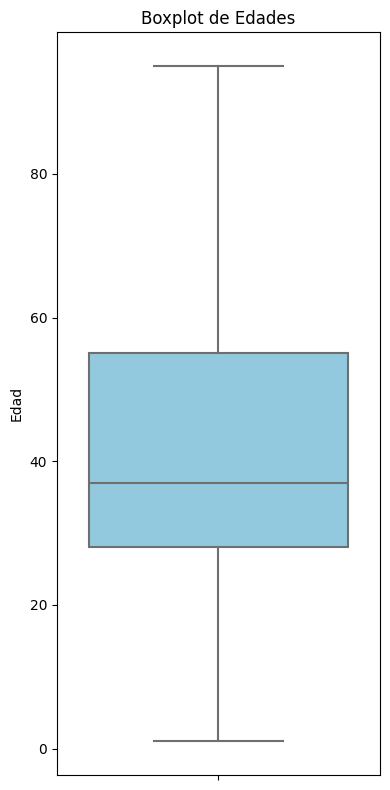

In [19]:
plt.figure(figsize=(4, 8))
# Boxplot de la columna 'edad'
sns.boxplot(data=datos, y='edad', color='skyblue')
plt.ylabel('Edad')
plt.title('Boxplot de Edades')

plt.tight_layout()  # Ajustar el espacio entre los subplots para evitar superposiciones
plt.show()

In [20]:
# Assuming 'datos' is your DataFrame
datos['fecha_fallecimiento'] = pd.to_datetime(datos['fecha_fallecimiento'])
mes = datos['fecha_fallecimiento'].dt.to_period('Y')
año22 = (mes == '2022').sum()

C:\Users\felix\AppData\Local\Temp\ipykernel_29660\1071709029.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  datos['fecha_fallecimiento'] = pd.to_datetime(datos['fecha_fallecimiento'])


In [21]:
mes = datos['fecha_fallecimiento'].dt.to_period('Y')
año22 = (mes == '2022').sum()
año22 

2

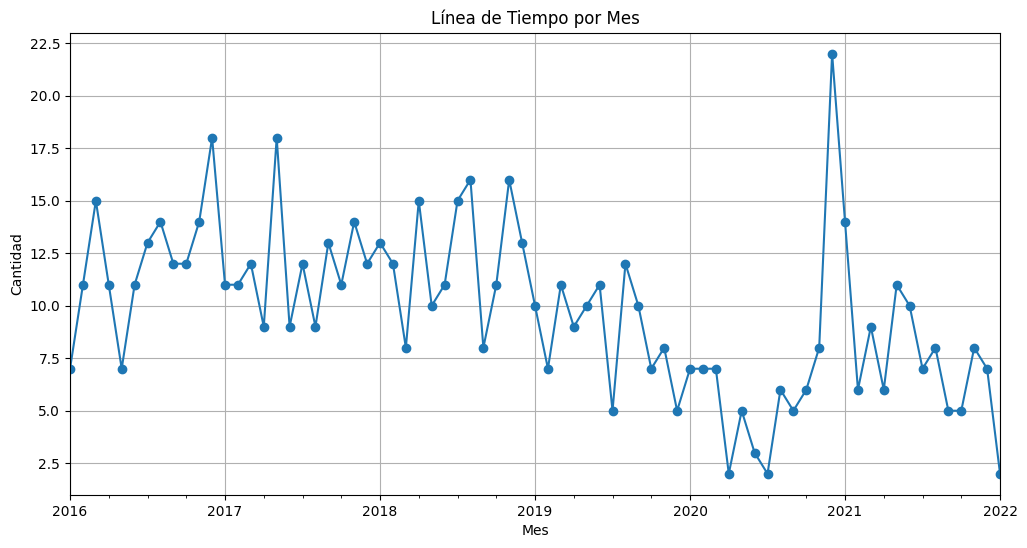

In [22]:

datos['mes'] = datos['fecha_fallecimiento'].dt.to_period('M')


conteo_por_mes = datos['mes'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
conteo_por_mes.plot(marker='o', linestyle='-')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Línea de Tiempo por Mes')
plt.grid(True)
plt.show()

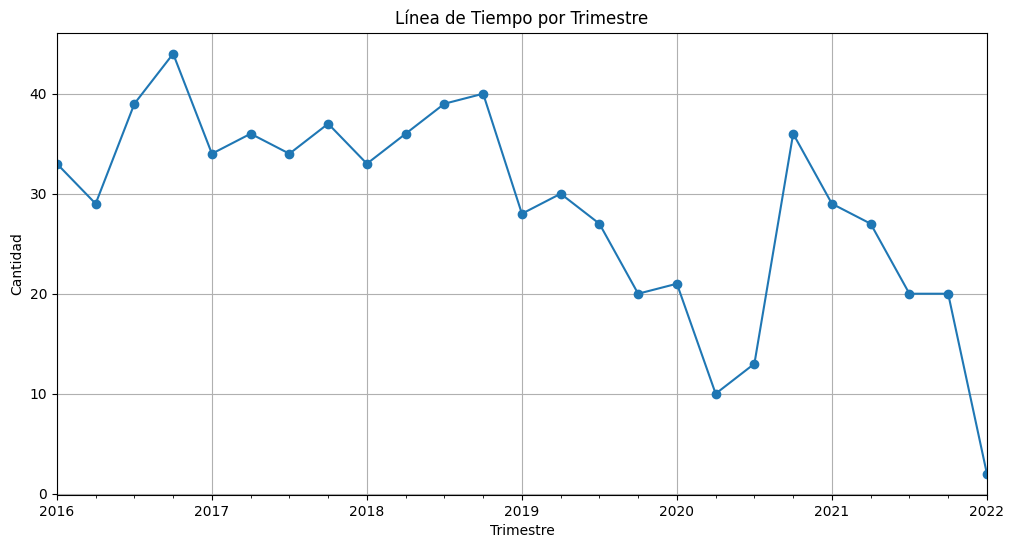

In [23]:
datos['trimestre'] = datos['fecha_fallecimiento'].dt.to_period('Q')

# Contar las ocurrencias de cada trimestre
conteo_por_trimestre = datos['trimestre'].value_counts().sort_index()

# Crear un gráfico de líneas por trimestre
plt.figure(figsize=(12, 6))
conteo_por_trimestre.plot(marker='o', linestyle='-')
plt.xlabel('Trimestre')
plt.ylabel('Cantidad')
plt.title('Línea de Tiempo por Trimestre')
plt.grid(True)
plt.show()

Es evidente que los picos más altos de fallecimientos ocurrieron a finales de 2016, mientras que los números más bajos se registraron durante el primer trimestre de 2020. Esta disminución podría estar relacionada con la pandemia, ya que la mayoría de las personas estaban bajo cuarentena en ese período. En general, se observa una tendencia a la disminución de las tasas de fallecimiento a lo largo del período estudiado.

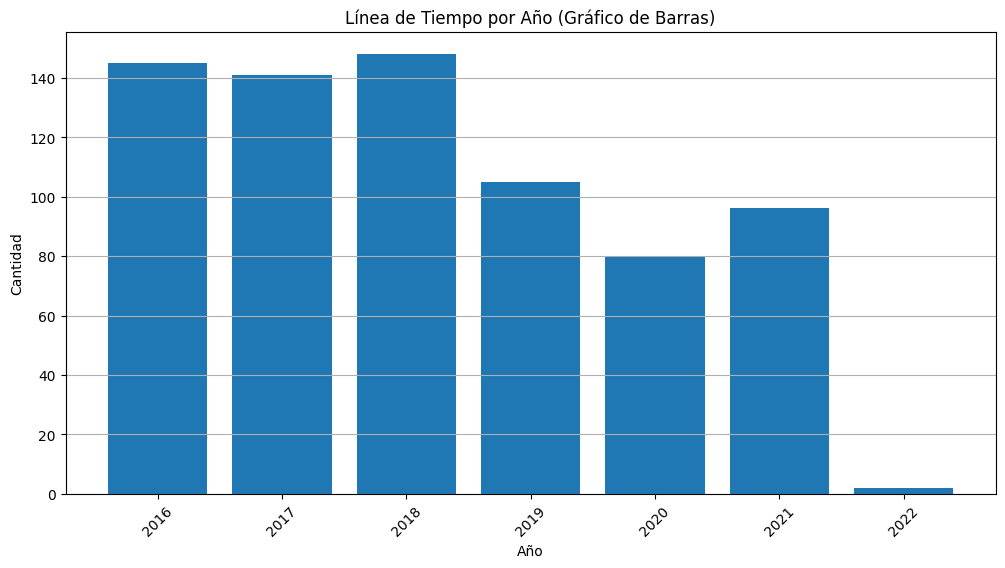

In [24]:
datos['año'] = datos['fecha_fallecimiento'].dt.year

# Contar las ocurrencias de cada año
conteo_por_año = datos['año'].value_counts().sort_index()

# Crear un gráfico de barras por año
plt.figure(figsize=(12, 6))
plt.bar(conteo_por_año.index, conteo_por_año.values, tick_label=conteo_por_año.index)
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Línea de Tiempo por Año (Gráfico de Barras)')
plt.grid(axis='y')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.show()

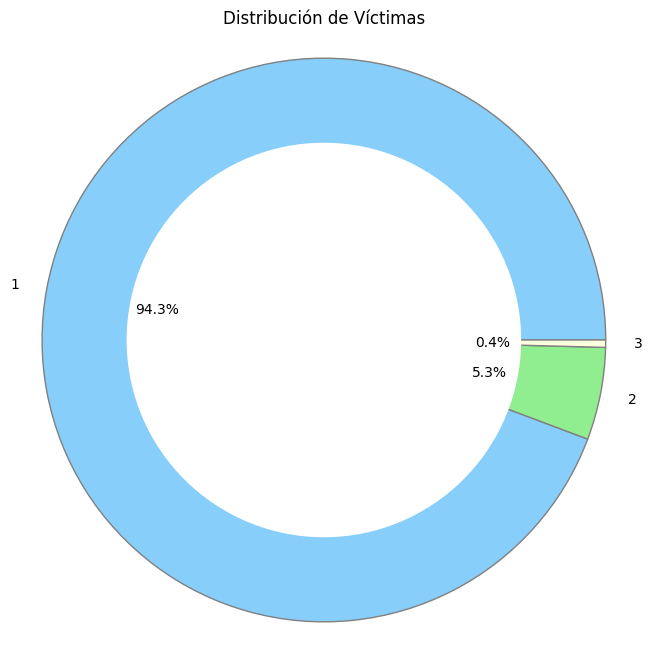

In [25]:
conteo_victimas = datos['n_victimas'].value_counts()

# Configurar los colores para el gráfico de donut
colores = ['lightskyblue', 'lightgreen', 'lightyellow']

# Crear un gráfico de donut
plt.figure(figsize=(8, 8))
plt.pie(conteo_victimas, labels=conteo_victimas.index, autopct='%1.1f%%', colors=colores, wedgeprops={'edgecolor': 'gray'})
plt.title('Distribución de Víctimas')
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))  # Agregar un círculo blanco para crear el efecto de donut
plt.axis('equal')  # Hacer que el gráfico sea circular
plt.show()

Al analizar la cantidad de víctimas por accidentes de tránsito, se nota que la gran mayoría de los siniestros involucra a una única víctima, representando un 94% de los casos. En un porcentaje menor, el 5.3% de los siniestros involucran a dos víctimas, mientras que apenas el 0.4% de los siniestros afectan a tres víctimas.

In [26]:
datos['fecha_hecho'] = pd.to_datetime(datos['fecha_hecho'])

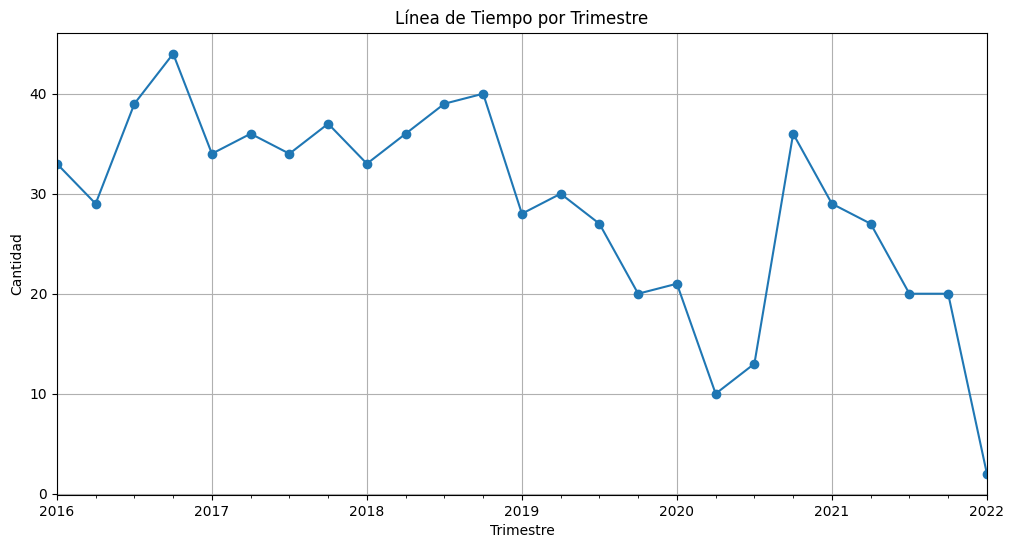

In [27]:
datos['fecha_hecho'] = datos['fecha_hecho'].dt.to_period('Q')

# Contar las ocurrencias de cada trimestre
conteo_por_trimestre = datos['trimestre'].value_counts().sort_index()

# Crear un gráfico de líneas por trimestre
plt.figure(figsize=(12, 6))
conteo_por_trimestre.plot(marker='o', linestyle='-')
plt.xlabel('Trimestre')
plt.ylabel('Cantidad')
plt.title('Línea de Tiempo por Trimestre')
plt.grid(True)
plt.show()

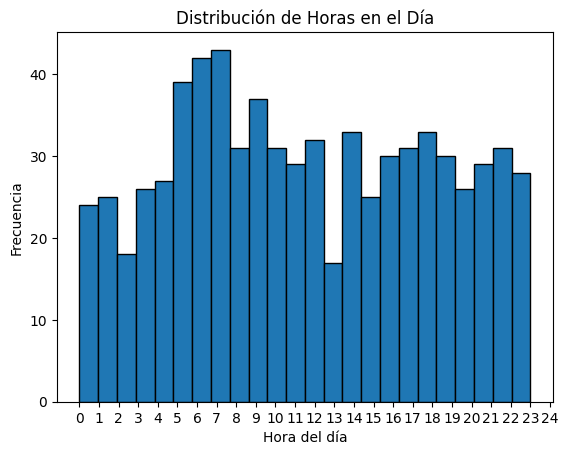

In [28]:
# Extraer solo las horas
datos['hora'] = pd.to_datetime(datos['hora']).dt.hour

# Crear un histograma de horas
plt.hist(datos['hora'], bins=24, edgecolor='k')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.title('Distribución de Horas en el Día')
plt.xticks(range(0, 25))
plt.show()

Al analizar la distribución de siniestros a lo largo del día, es evidente que la mayoría de ellos ocurren en el período comprendido entre las 5 y las 9 de la mañana, mientras que se registra una menor cantidad durante el mediodía y también después de la medianoche.

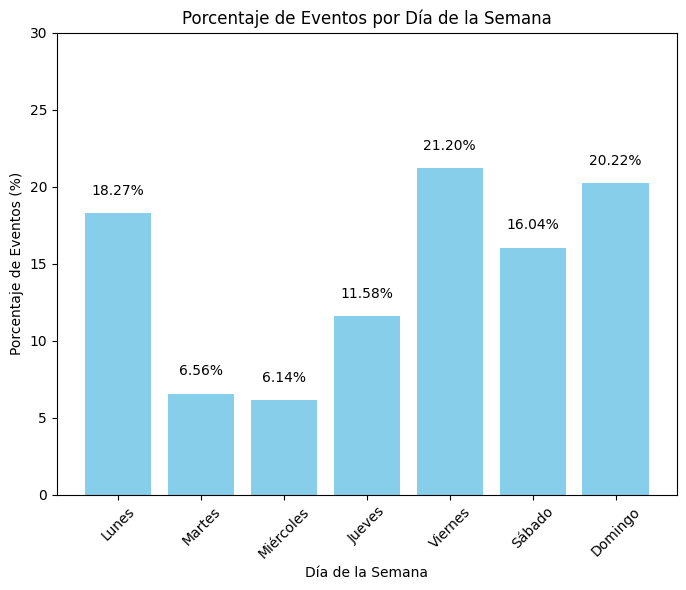

In [29]:

# Supongamos que 'datos' es tu DataFrame y 'fecha_hecho' es la columna con datos en formato datetime
# Convierte la columna 'fecha_hecho' a datetime
datos['fecha_hecho'] = datos['fecha_hecho'].dt.to_timestamp()

# Ahora puedes extraer el día de la semana y contar la cantidad de eventos por día
datos['Dia de la Semana'] = datos['fecha_hecho'].dt.weekday

# Contar la cantidad de eventos por día de la semana
eventos_por_dia = datos['Dia de la Semana'].value_counts().sort_index()

# Calcular el total de eventos
total_eventos = len(datos)

# Calcular el porcentaje de eventos por día de la semana
porcentaje_por_dia = (eventos_por_dia / total_eventos) * 100

# Crear el gráfico de barras con porcentaje
dias_semana = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
plt.figure(figsize=(8,6))

plt.bar(dias_semana, porcentaje_por_dia, color='skyblue')
plt.xlabel('Día de la Semana')
plt.ylabel('Porcentaje de Eventos (%)')
plt.title('Porcentaje de Eventos por Día de la Semana')
plt.xticks(rotation=45)

# Agregar etiquetas de porcentaje en las barras
for i, porcentaje in enumerate(porcentaje_por_dia):
    plt.text(i, porcentaje + 1, f'{porcentaje:.2f}%', ha='center', va='bottom')
plt.ylim(0, 30)
plt.show()

El gráfico revela que la mayoría de los siniestros ocurren durante los fines de semana, incluyendo el día lunes, lo que representa aproximadamente el 75% del total de siniestros.

In [30]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   717 non-null    object        
 1   rol                  717 non-null    object        
 2   sexo                 717 non-null    object        
 3   edad                 717 non-null    float64       
 4   fecha_fallecimiento  717 non-null    datetime64[ns]
 5   n_victimas           717 non-null    int64         
 6   fecha_hecho          717 non-null    datetime64[ns]
 7   aaaa                 717 non-null    int64         
 8   mm                   717 non-null    int64         
 9   dd                   717 non-null    int64         
 10  hora                 717 non-null    int64         
 11  hh                   717 non-null    object        
 12  lugar_del_hecho      717 non-null    object        
 13  tipo_de_calle        717 non-null  

In [31]:
datos['pos x']

0      -58.47533969
1      -58.50877521
2      -58.39040293
3      -58.46503904
4      -58.38718297
           ...     
712    -58.40596860
713    -58.43353773
714    -58.46739825
715    -58.47293407
716    -58.47066794
Name: pos x, Length: 717, dtype: object

In [32]:
datos['pos y']

0      -34.68757022
1      -34.66977709
2      -34.63189362
3      -34.68092974
4      -34.62246630
           ...     
712    -34.61011987
713    -34.64561636
714    -34.65117757
715    -34.61984745
716    -34.65021673
Name: pos y, Length: 717, dtype: object

In [33]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd
from IPython.display import display

# Supongamos que tienes un DataFrame llamado 'datos' con las columnas 'pos x' y 'pos y'

# Filtrar las filas que contienen coordenadas válidas
datos = datos[datos['pos x'] != '.']
datos = datos[datos['pos y'] != '.']

# Convertir las columnas 'pos x' y 'pos y' a tipo float
datos['pos x'] = datos['pos x'].astype(float)
datos['pos y'] = datos['pos y'].astype(float)

# Crear un mapa centrado en Buenos Aires
m = folium.Map(location=[-34.6083, -58.3712], zoom_start=12)

# Crear un grupo de marcadores para agrupar los siniestros cercanos
marker_cluster = MarkerCluster().add_to(m)

# Iterar sobre las filas del DataFrame y agregar marcadores para cada siniestro
for index, row in datos.iterrows():
    latitud = row['pos y']
    longitud = row['pos x']
    
    # Crea un marcador en las coordenadas de cada siniestro
    folium.Marker([latitud, longitud], icon=folium.Icon(icon='circle', prefix='fa', icon_color='blue', icon_size=(10, 10))).add_to(marker_cluster)

# Mostrar el mapa en el Jupyter Notebook
display(m)